In [1]:
pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from datetime import datetime
import yfinance as yf
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import yfinance as yf
yf.pdr_override()

In [4]:
tech_list = ['NVDA', 'GOOG', 'NFLX', "TSLA"]
tech_list = ['NVDA', 'GOOG', 'NFLX', "TSLA"]
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
company_list = [NVDA, GOOG, NFLX, TSLA]
company_name = ["NVIDIA", "GOOGLE", "NETFLIX" , "TESLA"]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name   
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-06-28,199.550003,203.199997,195.259995,197.880005,197.880005,95438100,TESLA
2024-07-01,201.020004,213.229996,200.850006,209.860001,209.860001,135691400,TESLA
2024-07-02,218.889999,231.300003,218.059998,231.259995,231.259995,205047900,TESLA
2024-07-03,234.559998,248.350006,234.250000,246.389999,246.389999,166561500,TESLA
2024-07-05,249.809998,252.369995,242.460007,251.520004,251.520004,154501200,TESLA
2024-07-08,247.710007,259.440002,244.570007,252.940002,252.940002,157219600,TESLA
2024-07-09,251.000000,265.609985,250.300003,262.329987,262.329987,160210900,TESLA
2024-07-10,262.799988,267.589996,257.859985,263.260010,263.260010,128519400,TESLA
2024-07-11,263.299988,271.000000,239.649994,241.029999,241.029999,221707300,TESLA


In [5]:
NFLX.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,519.418691,525.658135,513.342779,519.577461,519.577461,4.672505e+06
std,97.238428,98.078613,96.504079,97.822915,97.822915,3.541540e+06
min,351.000000,354.790009,344.730011,346.190002,346.190002,1.403500e+06
25%,435.172508,438.219994,428.605003,434.377487,434.377487,2.835625e+06
50%,490.804993,494.084991,483.940002,489.889999,489.889999,3.694350e+06
75%,613.744995,620.410019,606.020004,613.137512,613.137512,5.063700e+06
max,690.000000,697.489990,684.719971,690.650024,690.650024,2.807440e+07


In [6]:
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-07-13 to 2024-07-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


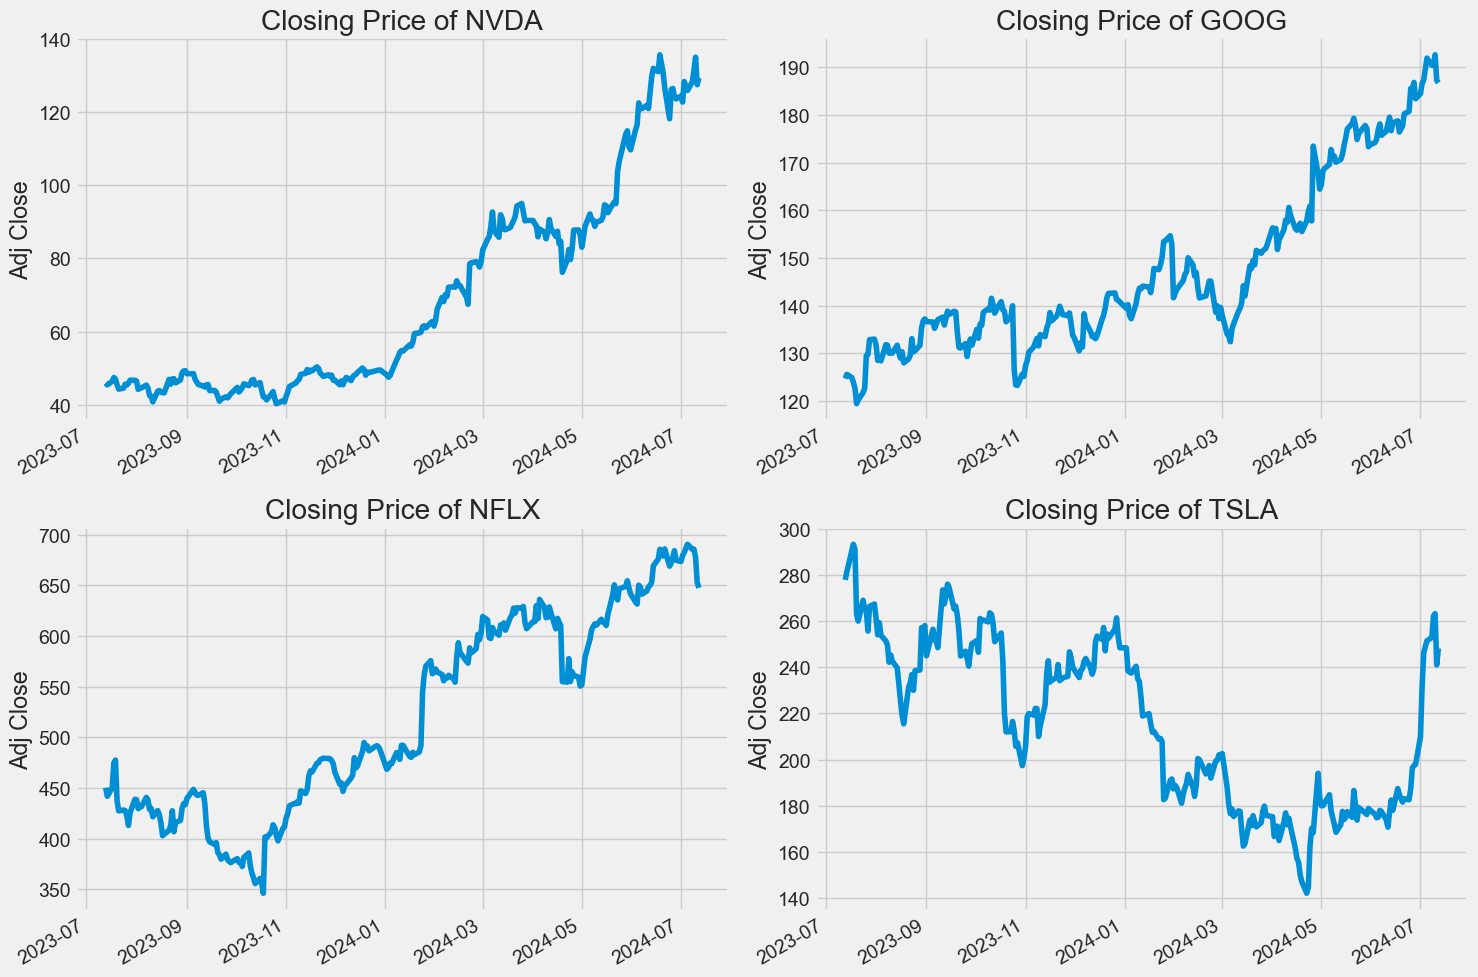

In [7]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
plt.tight_layout()

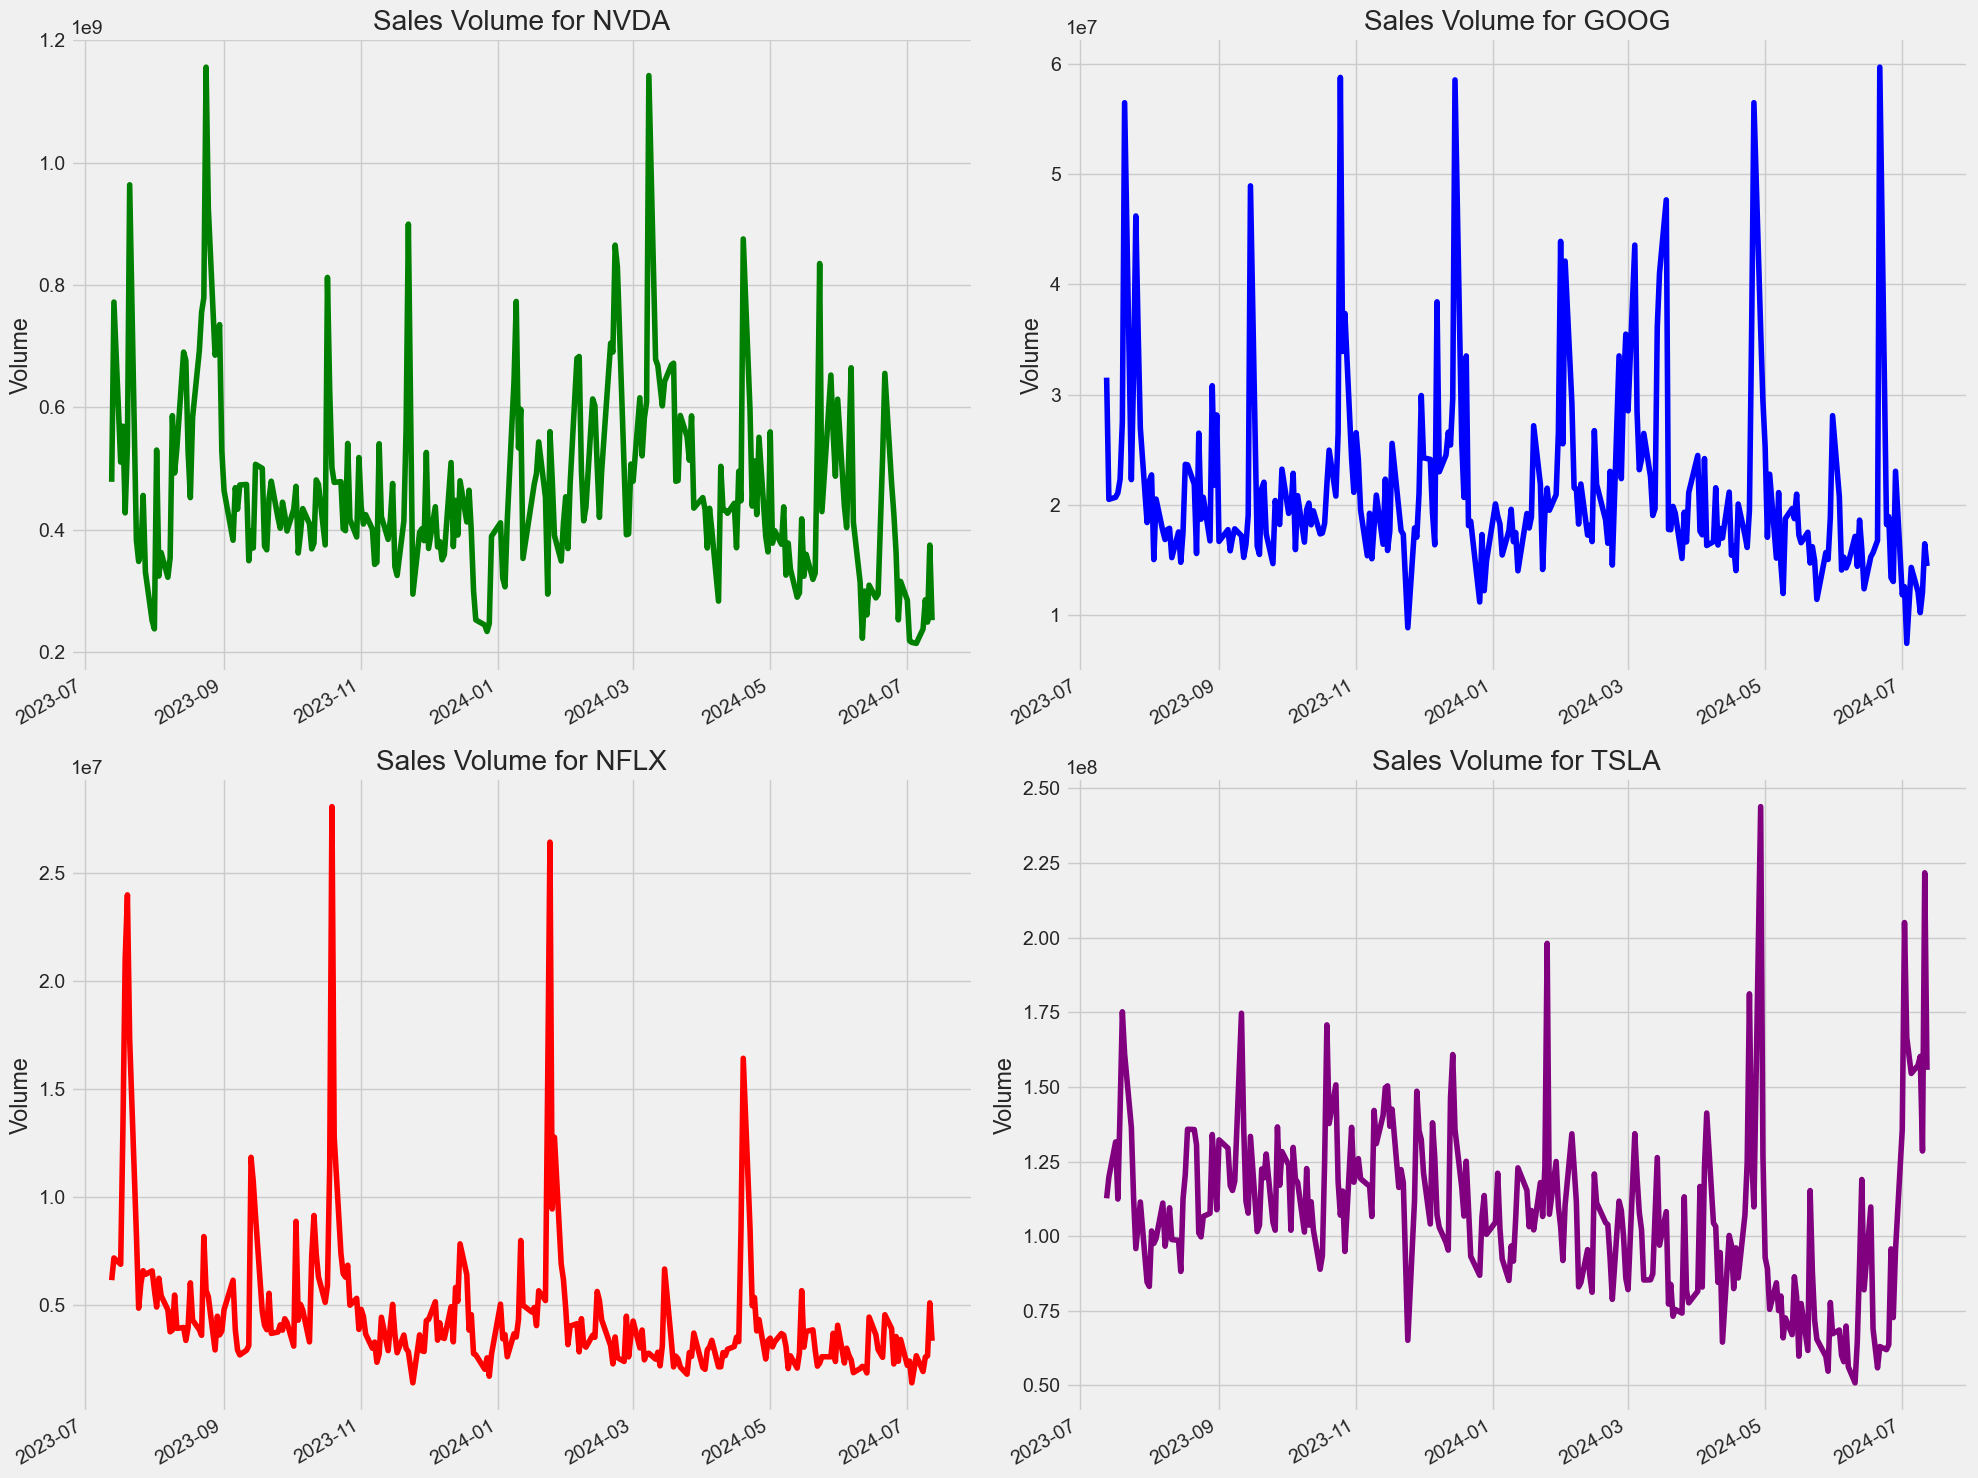

In [8]:
colors = ['green', 'blue', 'red', 'purple']
plt.figure(figsize=(20, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(color=colors[i-1])  # Use color parameter to set color
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()
plt.show()

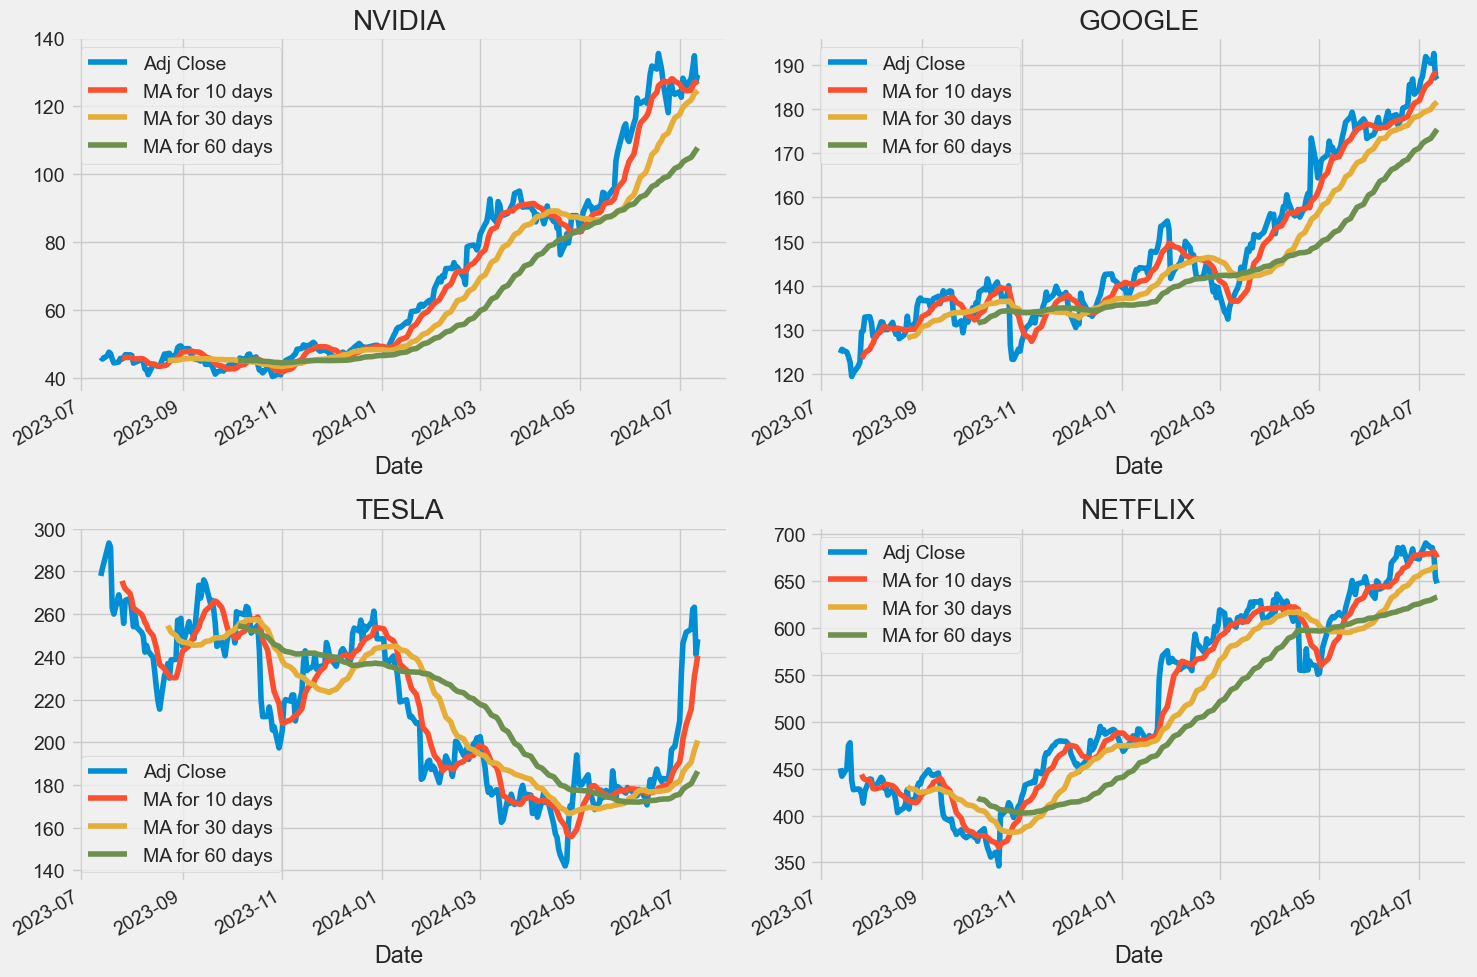

In [9]:
ma_day = [10, 30, 60]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()   
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
NVDA[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[0,0])
axes[0,0].set_title('NVIDIA')
GOOG[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')
NFLX[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[1,1])
axes[1,1].set_title('NETFLIX')
TSLA[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[1,0])
axes[1,0].set_title('TESLA')
fig.tight_layout()

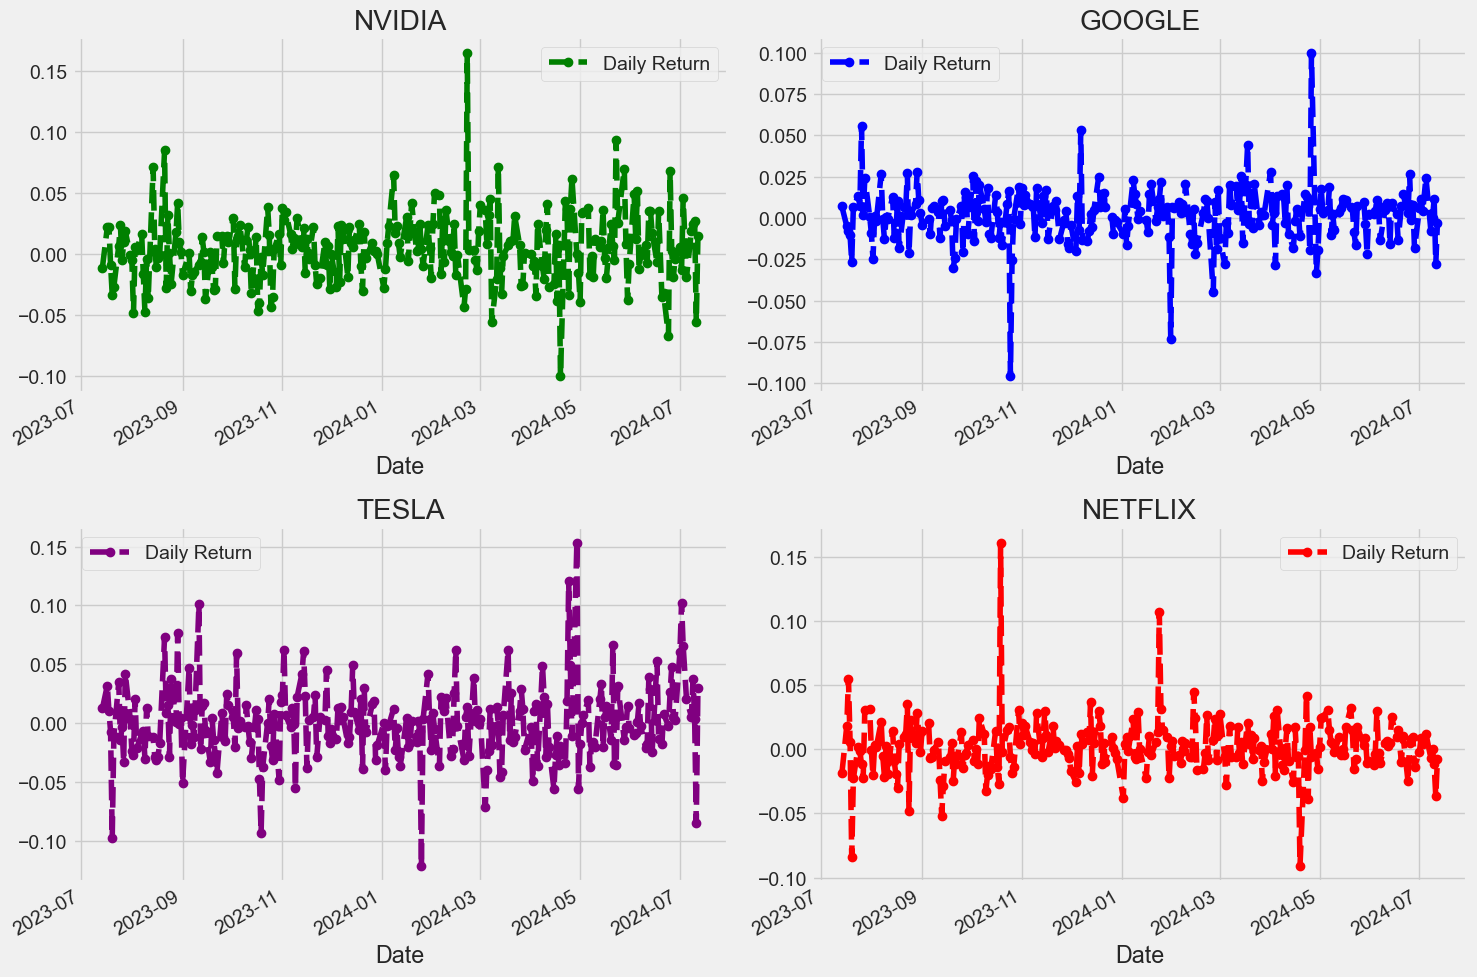

In [10]:
# Calculate daily returns for each company in the company list
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
# Create a 2x2 subplot
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
# Plot daily returns for each company with specified colors
NVDA['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o', color='green')
axes[0,0].set_title('NVIDIA')
GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o', color='blue')
axes[0,1].set_title('GOOGLE')
TSLA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o', color='purple')
axes[1,0].set_title('TESLA')
NFLX['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o', color='red')
axes[1,1].set_title('NETFLIX')
# Adjust layout for better display
fig.tight_layout()
# Show plot
plt.show()


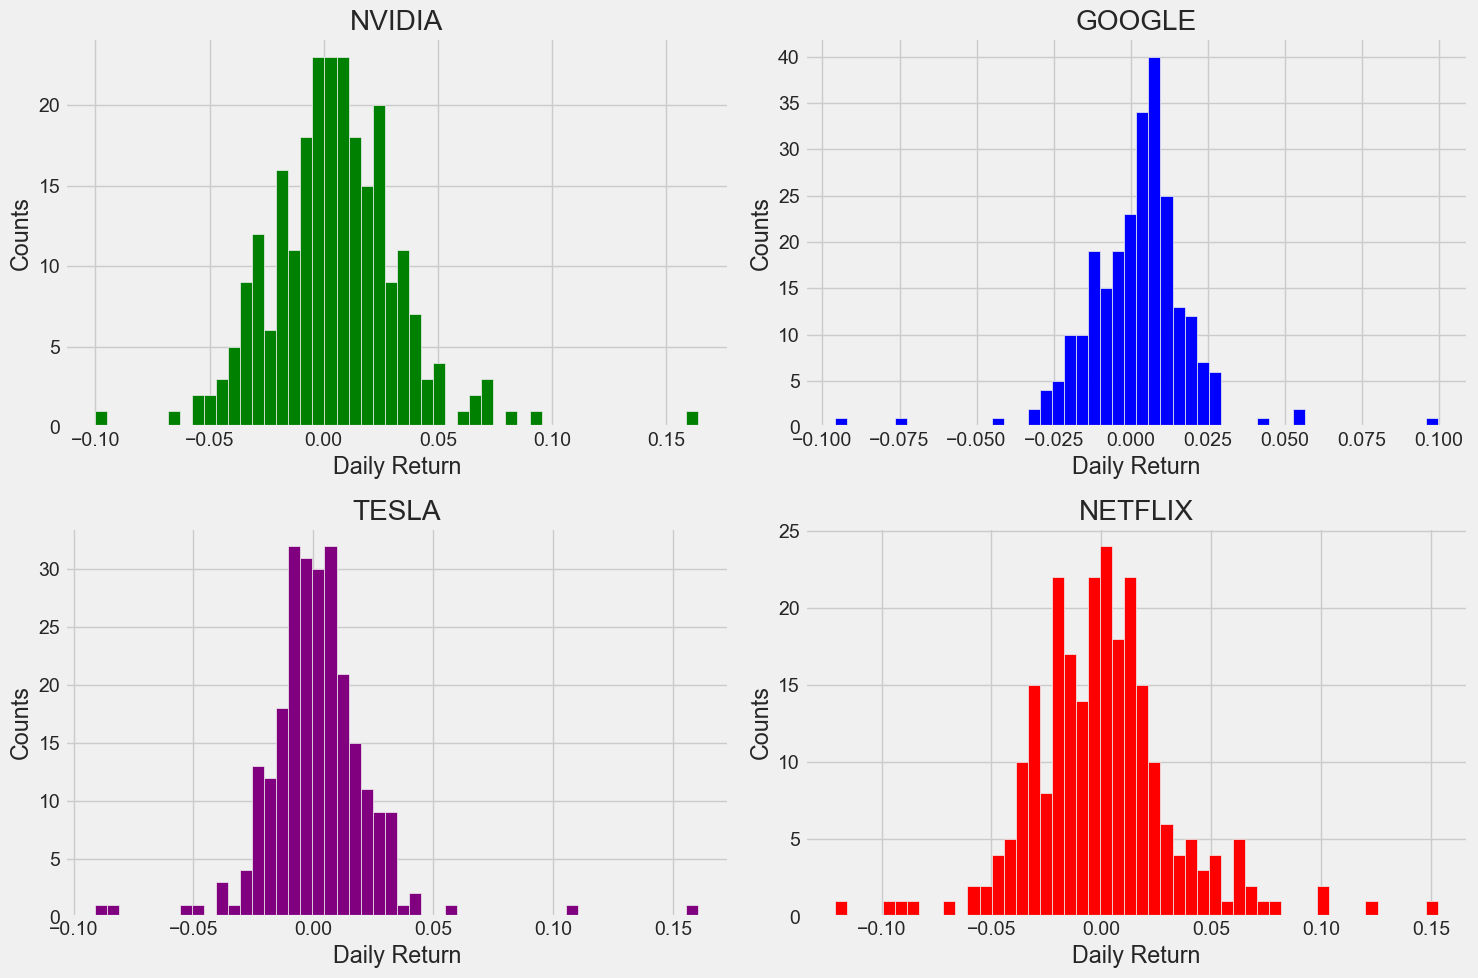

In [11]:
import matplotlib.pyplot as plt
# Sample company list and names (replace with actual data)
company_list = [NVDA, GOOG, NFLX, TSLA]  # Assuming company1, company2, etc. are DataFrames
company_name = ['NVIDIA', 'GOOGLE', 'TESLA', 'NETFLIX']
# Define a list of colors
colors = ['green', 'blue', 'purple', 'red']
plt.figure(figsize=(15, 10))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50, color=colors[i - 1])  # Assign a color from the list
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
plt.tight_layout()
plt.show()

In [12]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,GOOG,NFLX,NVDA,TSLA
Date,,,,
2023-07-13,NaN,NaN,NaN,NaN
2023-07-14,0.006969,-0.018806,-0.011049,0.012523
2023-07-17,-0.005092,0.018420,0.021817,0.031985
2023-07-18,-0.007836,0.054994,0.022234,0.010194
2023-07-19,-0.010477,0.005876,-0.008780,-0.007091


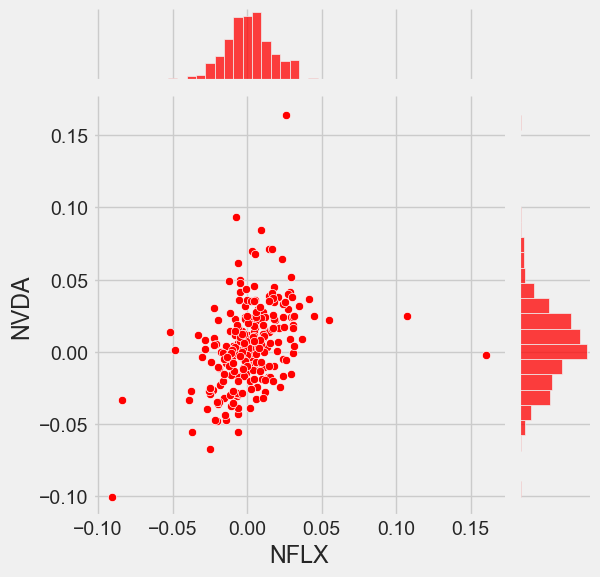

In [13]:
sns.jointplot(x='NFLX', y='NVDA', data=tech_rets, kind='scatter', color='red')

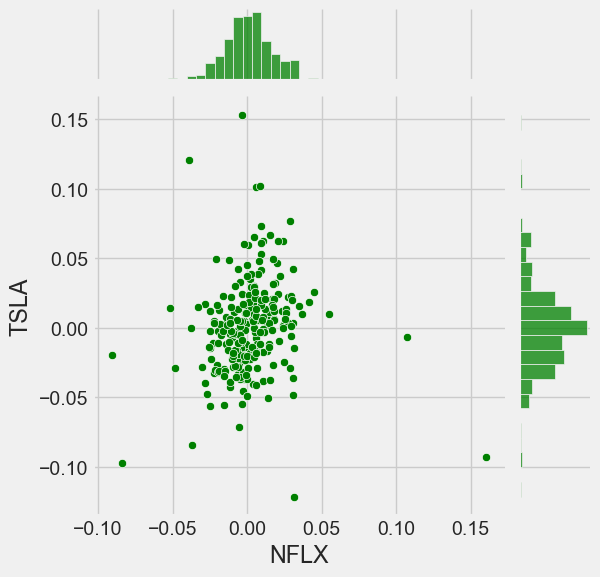

In [14]:
sns.jointplot(x='NFLX', y='TSLA', data=tech_rets, kind='scatter', color='green')

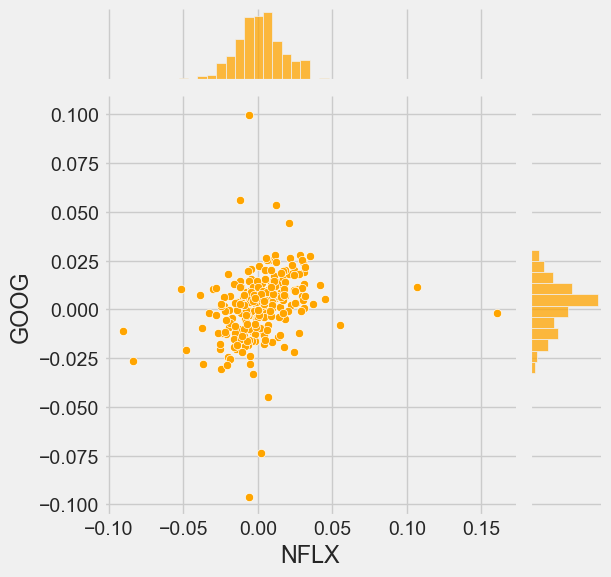

In [15]:
sns.jointplot(x='NFLX', y='GOOG', data=tech_rets, kind='scatter', color='orange')

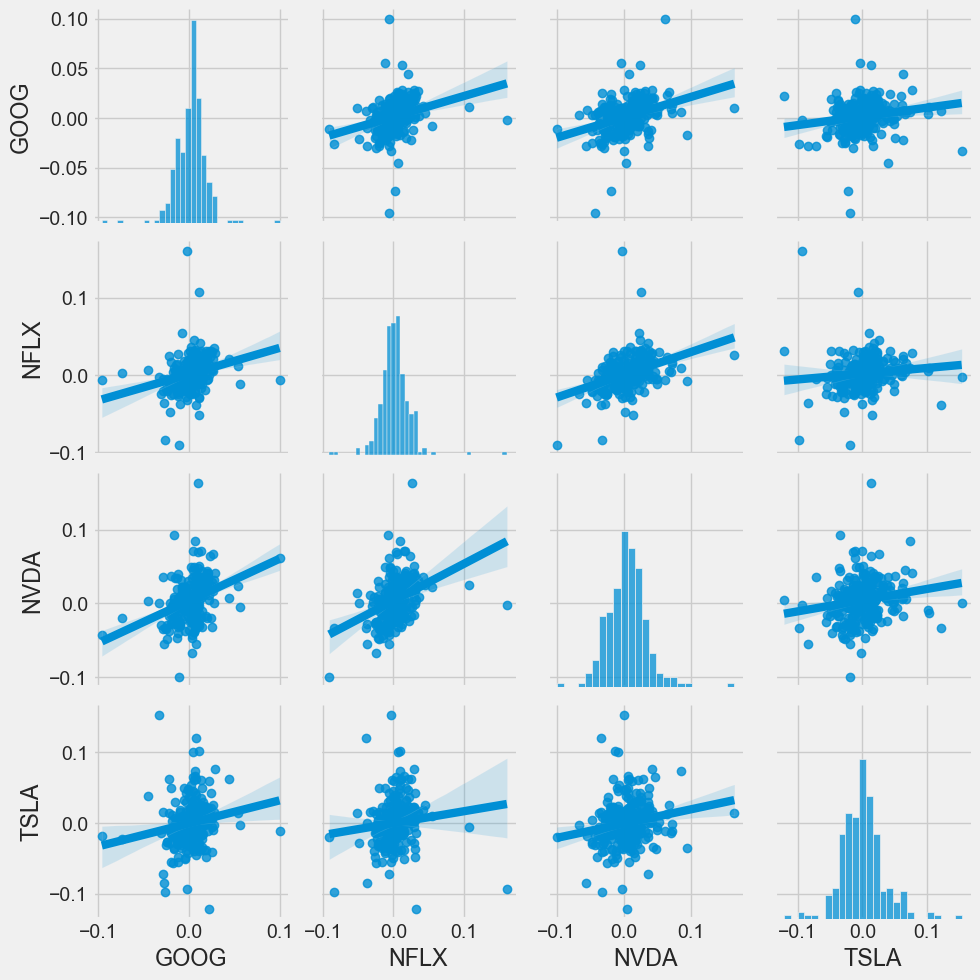

In [16]:
sns.pairplot(tech_rets, kind='reg')

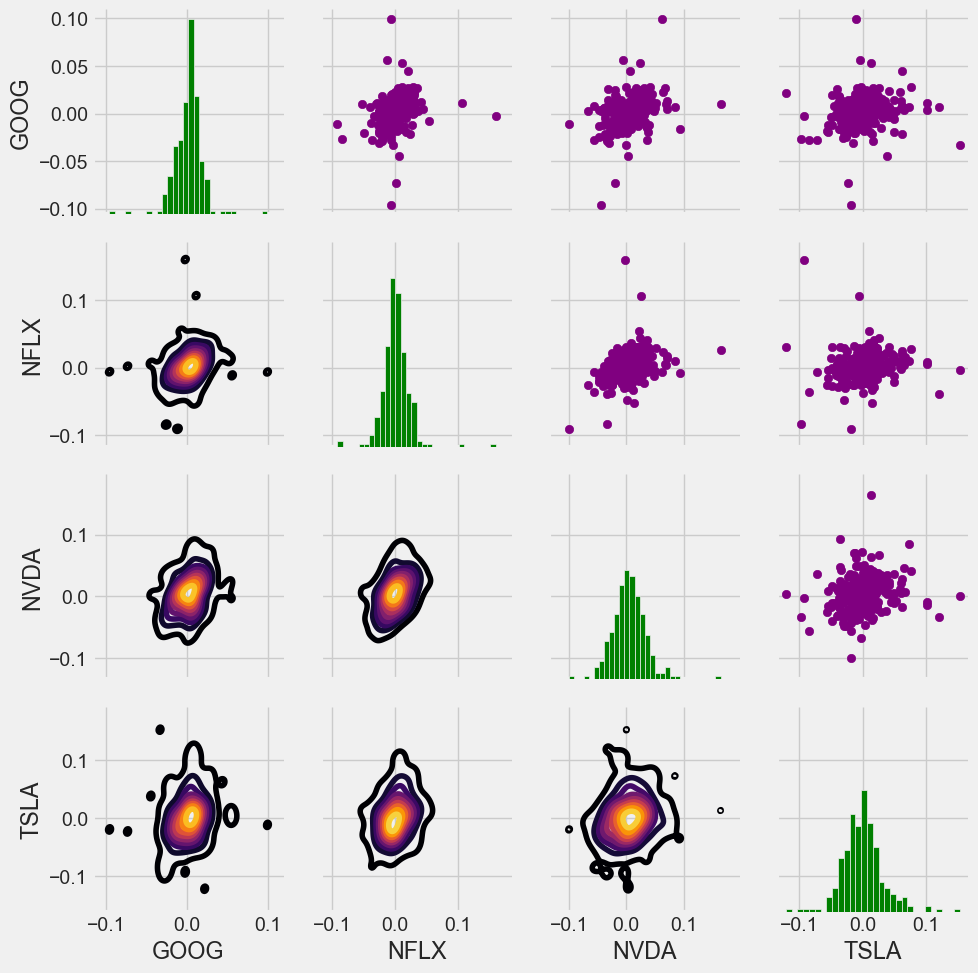

In [17]:
tech_rets = tech_rets.dropna()
# Create the PairGrid
return_fig = sns.PairGrid(tech_rets)
# Map the upper triangle to scatter plot with red color
return_fig.map_upper(plt.scatter, color='purple')
# Map the lower triangle to kde plot with 'coolwarm' colormap
return_fig.map_lower(sns.kdeplot, cmap='inferno')
# Map the diagonal to histogram with 30 bins and blue color
return_fig.map_diag(plt.hist, bins=30, color='green')
# Show the plot
plt.show()

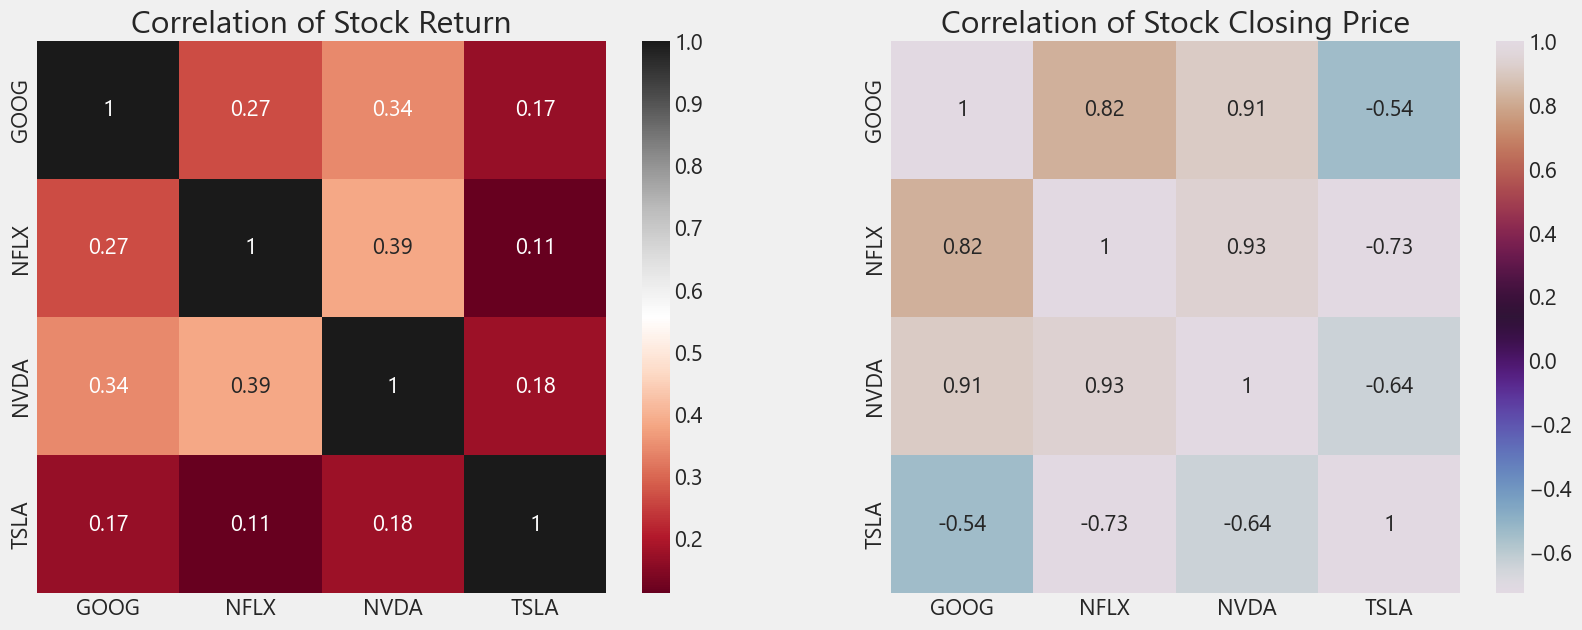

In [18]:
# Set font and font size
plt.rcParams.update({'font.size': 16, 'font.family': 'Segoe UI'})  # Change 'serif' to your preferred font
# Your plotting code
plt.figure(figsize=(18, 15))
# Subplot 1: Correlation of Stock Return
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='RdGy')
plt.title('Correlation of Stock Return')
# Subplot 2: Correlation of Stock Closing Price
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='twilight')
plt.title('Correlation of Stock Closing Price')
# Show plot
plt.show()

C:\Users\anupa\AppData\Local\Temp\ipykernel_7468\2675650021.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, ticks=np.arange(len(rets.columns)), orientation='vertical', fraction=0.02, pad=0.04)


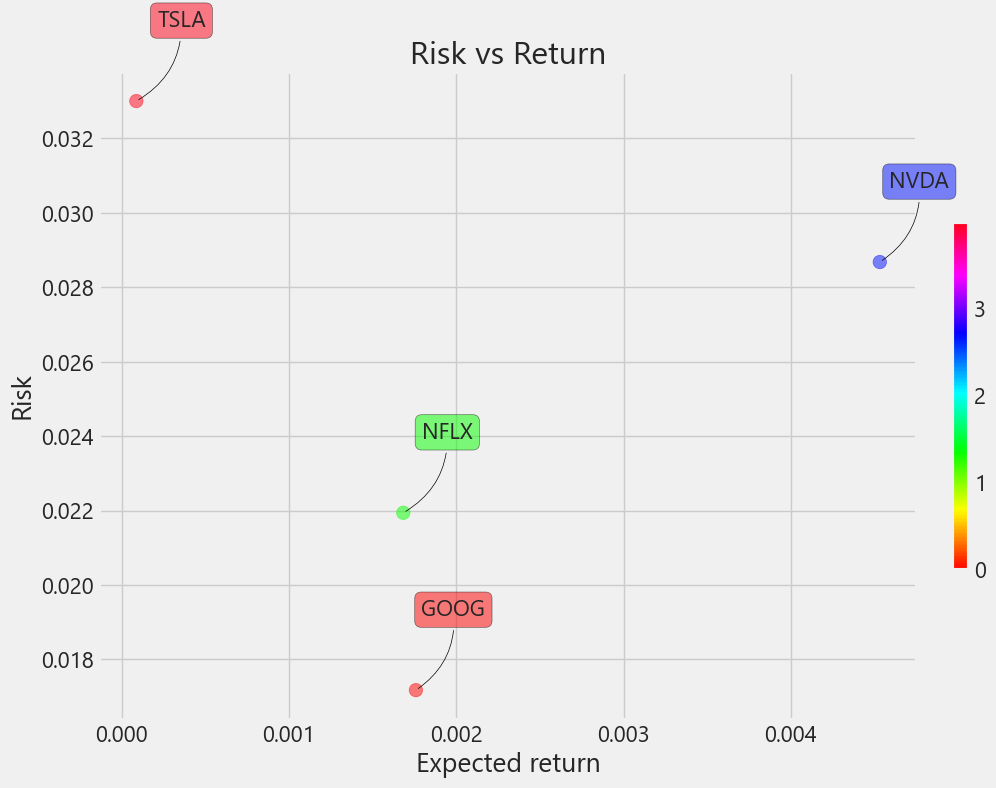

In [19]:
# Assuming 'rets' is the DataFrame with stock returns data
rets = tech_rets.dropna()
area = np.pi * 30
# Define a colormap
cmap = plt.get_cmap('hsv')
colors = cmap(np.linspace(0, 1, len(rets.columns)))
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area, c=colors, alpha=0.5)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('Risk vs Return')
# Add annotations with color
for label, x, y, color in zip(rets.columns, rets.mean(), rets.std(), colors):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color="black", connectionstyle='arc3,rad=-0.3'),
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor=color, alpha=0.5))
# Show color bar to identify which color corresponds to which stock
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(rets.columns)))
sm.set_array([])
plt.colorbar(sm, ticks=np.arange(len(rets.columns)), orientation='vertical', fraction=0.02, pad=0.04)
plt.show()

In [20]:
df = pdr.get_data_yahoo('NFLX', start='2012-02-01', end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-02-01,17.344286,17.678572,16.892857,17.567142,17.567142,52306800
2012-02-02,17.642857,17.964287,17.464287,17.714287,17.714287,41126400
2012-02-03,17.857143,18.212856,17.620001,18.061428,18.061428,46788000
2012-02-06,17.602858,18.657143,17.407143,18.464287,18.464287,81617200
2012-02-07,18.389999,19.061428,18.115713,18.268572,18.268572,81435200
...,...,...,...,...,...,...
2024-07-08,687.000000,688.859985,681.489990,685.739990,685.739990,1930800
2024-07-09,690.000000,695.270020,684.719971,685.739990,685.739990,2596100
2024-07-10,685.020020,687.219971,673.159973,677.650024,677.650024,2651900


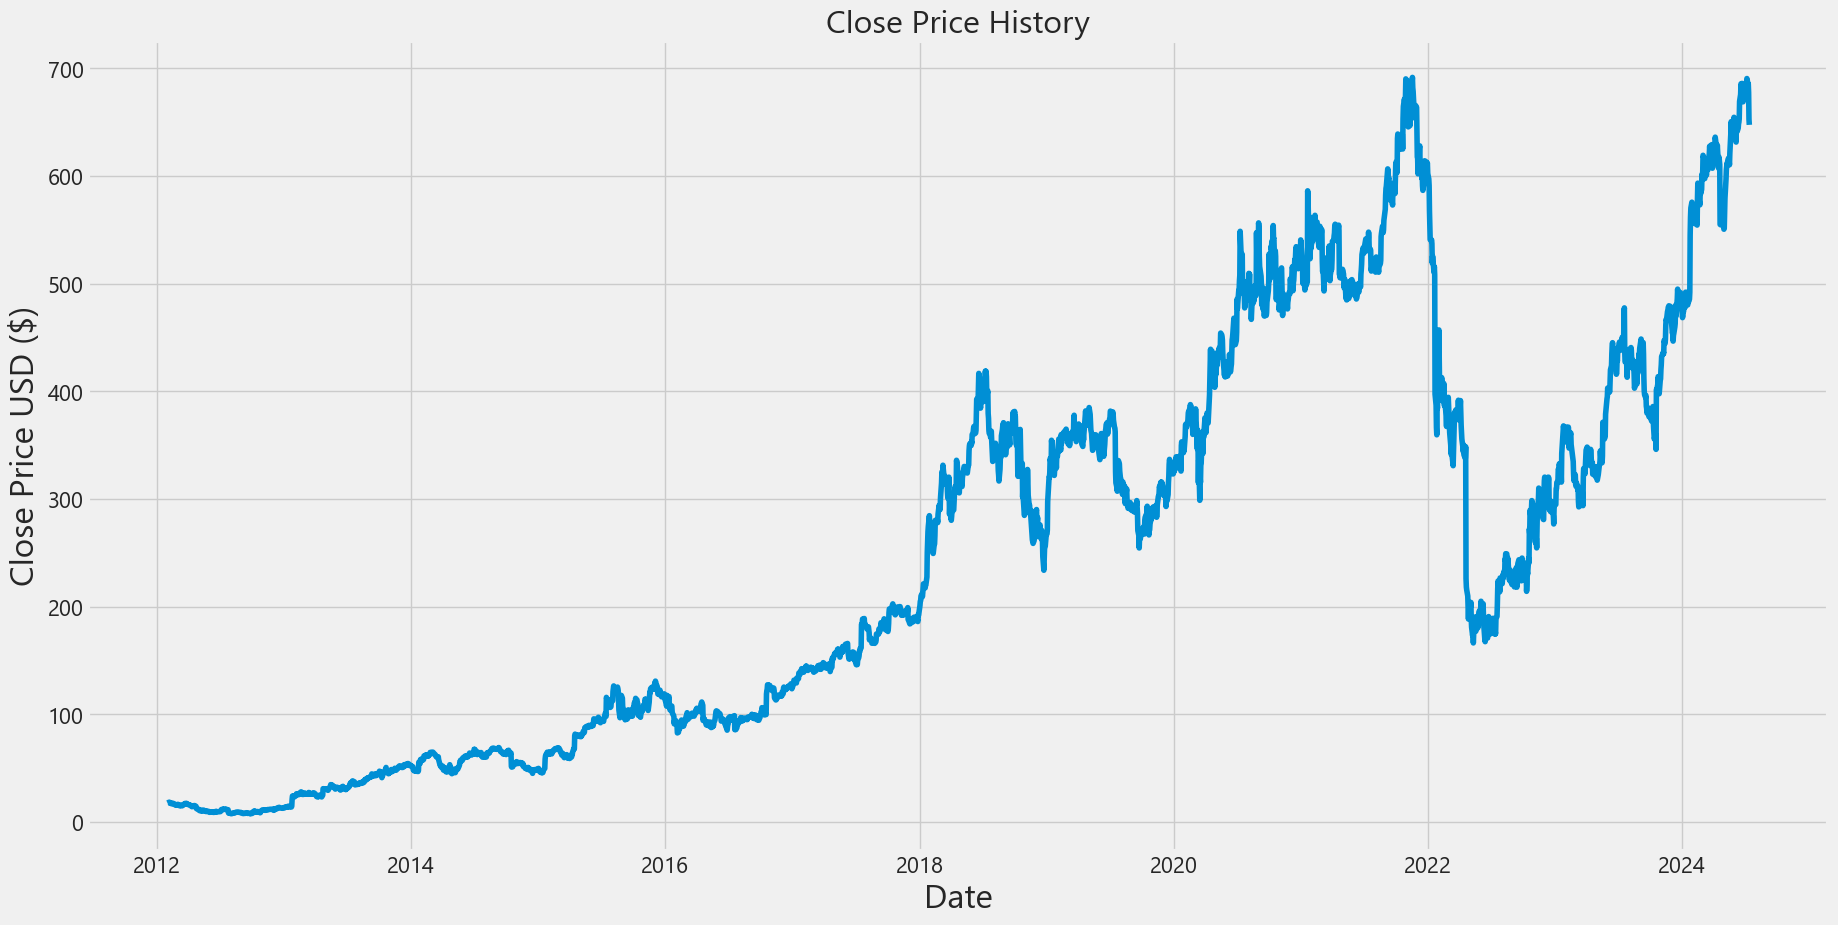

In [21]:
plt.figure(figsize=(20,10))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=24)
plt.ylabel('Close Price USD ($)', fontsize=24)
plt.show()

In [22]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2975

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01444644],
       [0.01466156],
       [0.01516908],
       ...,
       [0.97947385],
       [0.94307053],
       [0.9355413 ]])

In [24]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.01444644, 0.01466156, 0.01516908, 0.01575805, 0.01547192,
       0.01466156, 0.014837  , 0.01464694, 0.01347109, 0.01446733,
       0.01425639, 0.01422506, 0.01421253, 0.01328313, 0.01223885,
       0.01236208, 0.01208639, 0.01161438, 0.012431  , 0.01189007,
       0.01231195, 0.01280276, 0.01190678, 0.01113819, 0.01073302,
       0.01133452, 0.0115559 , 0.01094396, 0.01097529, 0.01074555,
       0.01177311, 0.01172925, 0.01264194, 0.01278605, 0.01384703,
       0.0135609 , 0.01386583, 0.01424177, 0.01396608, 0.01357761,
       0.01279232, 0.01279023, 0.01256676, 0.01235581, 0.01179191,
       0.01184203, 0.01104421, 0.01005006, 0.00960938, 0.01053878,
       0.01051999, 0.00988925, 0.01111522, 0.01110269, 0.01112984,
       0.01092516, 0.01003335, 0.00707598, 0.0067982 , 0.00653087])]
[0.006253094533499058]

[array([0.01444644, 0.01466156, 0.01516908, 0.01575805, 0.01547192,
       0.01466156, 0.014837  , 0.01464694, 0.01347109, 0.01446733,
       0.01425639, 0.01422506, 0.0

In [25]:
pip install tensorflow-datasets

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

2915/2915 [==============================] - 42s 13ms/step - loss: 0.0012


In [27]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 15ms/step


15.33938718650277

C:\Users\anupa\AppData\Local\Temp\ipykernel_7468\2882300990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


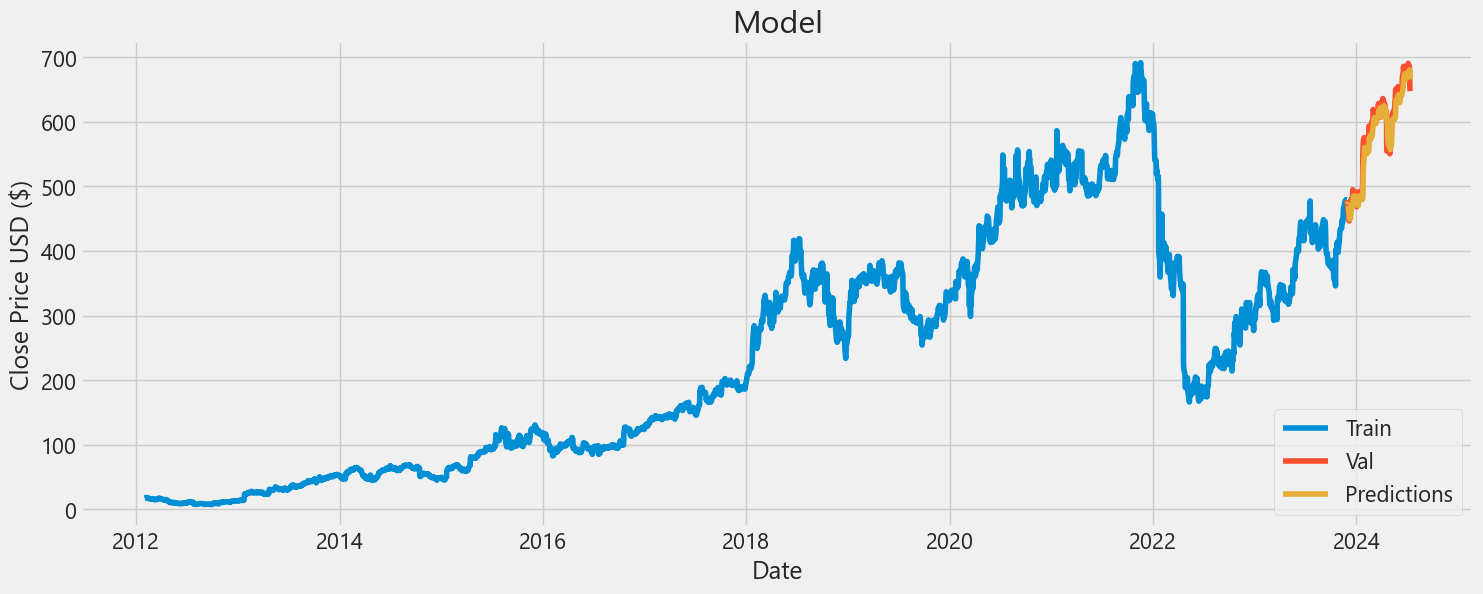

In [28]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()